In [17]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("Clean_Dataset.csv")
df

Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           Mumbai   Economy      2.17          1   5953  
1             Morning           Mumbai   Economy      2.33          1   5953  
2       Early_Morning           Mumbai   Economy      2.17          1   5956  
3           Afternoon           Mumbai   Economy      2.25          1   5955  
4             Morning           Mumbai   Economy      2.33          1   5955  
...               ...              ...       ...       ...        ...    ...  
300148        Evening        Hyderabad  Business     10.08         49  69265  
300149          Night        Hyderabad  Business     10.42         49  77105  
300150          Night        Hyderabad  Business     13.83         49  79099  
300151        Evening        Hyderabad  Business     10.00         49  81585  
300152        Evening        Hyderabad  Business     10.08         49  81585  

[300153 rows x 12 columns]

In [11]:
df = df.drop("Unnamed: 0", axis=1)
df

airline   flight source_city departure_time stops   arrival_time  \
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
300148   Vistara   UK-822     Chennai        Morning   one        Evening   
300149   Vistara   UK-826     Chennai      Afternoon   one          Night   
300150   Vistara   UK-832     Chennai  Early_Morning   one          Night   
300151   Vistara   UK-828     Chennai  Early_Morning   one        Evening   
300152   Vistara   UK-822     Chennai        Morning   one        Evening   

       destination_city     class  duration  days_left  price  
0                Mumbai   Economy      2.17          1   5953  
1                Mumbai   Economy      2.33          1   5953  
2                Mumbai   Economy      2.17          1   5956  
3                Mumbai   Economy      2.25          1   5955  
4                Mumbai   Economy      2.33          1   5955  
...                 ...       ...       ...        ...    ...  
300148        Hyderabad  Business     10.08         49  69265  
300149        Hyderabad  Business     10.42         49  77105  
300150        Hyderabad  Business     13.83         49  79099  
300151        Hyderabad  Business     10.00         49  81585  
300152        Hyderabad  Business     10.08         49  81585  

[300153 rows x 11 columns]

In [13]:
df.describe()

duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000

In [15]:
df.describe(include="object")

airline  flight source_city departure_time   stops arrival_time  \
count    300153  300153      300153         300153  300153       300153   
unique        6    1561           6              6       3            6   
top     Vistara  UK-706       Delhi        Morning     one        Night   
freq     127859    3235       61343          71146  250863        91538   

       destination_city    class  
count            300153   300153  
unique                6        2  
top              Mumbai  Economy  
freq              59097   206666

2nd: Business class dataset:

In [24]:
# Filter for business class flyers
business_class_flyers = df[df['class'] == 'Business']

# Display the first few rows of the filtered data
business_class_flyers.head()

airline  flight source_city departure_time stops arrival_time  \
206666  Air_India  AI-868       Delhi        Evening  zero      Evening   
206667  Air_India  AI-624       Delhi        Evening  zero        Night   
206668  Air_India  AI-531       Delhi        Evening   one        Night   
206669  Air_India  AI-839       Delhi          Night   one        Night   
206670  Air_India  AI-544       Delhi        Evening   one        Night   

       destination_city     class  duration  days_left  price  
206666           Mumbai  Business      2.00          1  25612  
206667           Mumbai  Business      2.25          1  25612  
206668           Mumbai  Business     24.75          1  42220  
206669           Mumbai  Business     26.50          1  44450  
206670           Mumbai  Business      6.67          1  46690

In [34]:
# Filter for day business class flyers
nightdeparturetime_flyers = df[df['departure_time'] == 'Night']

# Display the first few rows of the filtered data
nightdeparturetime_flyers.head()

airline  flight source_city departure_time stops arrival_time  \
40  Air_India  AI-504       Delhi          Night   one      Morning   
44  Air_India  AI-479       Delhi          Night   one    Afternoon   
50  Air_India  AI-540       Delhi          Night   one      Morning   
58     Indigo  6E-369       Delhi          Night   one      Morning   
69    Vistara  UK-871       Delhi          Night   one    Afternoon   

   destination_city    class  duration  days_left  price  
40           Mumbai  Economy     11.00          1  12150  
44           Mumbai  Economy     17.75          1  12215  
50           Mumbai  Economy     11.42          1  12990  
58           Mumbai  Economy     10.42          1  13279  
69           Mumbai  Economy     17.92          1  14408

In [36]:
# Filter for business class flyers
economy_class_flyers = df[df['class'] == 'Economy']

# Display the first few rows of the filtered data
economy_class_flyers.head()

airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955

In [38]:
air_indiaflyers=df[df['airline'] == 'Air_India']
air_indiaflyers.head()

airline  flight source_city departure_time stops arrival_time  \
16  Air_India  AI-887       Delhi  Early_Morning  zero      Morning   
17  Air_India  AI-665       Delhi  Early_Morning  zero      Morning   
23  Air_India  AI-441       Delhi        Evening   one        Night   
37  Air_India  AI-453       Delhi  Early_Morning   one    Afternoon   
40  Air_India  AI-504       Delhi          Night   one      Morning   

   destination_city    class  duration  days_left  price  
16           Mumbai  Economy      2.08          1   5955  
17           Mumbai  Economy      2.17          1   5955  
23           Mumbai  Economy      3.75          1   5955  
37           Mumbai  Economy      8.83          1  11900  
40           Mumbai  Economy     11.00          1  12150

In [40]:
Vistaraflyers=df[df['airline'] == 'Vistara']
Vistaraflyers.head()

airline  flight source_city departure_time stops arrival_time  \
3  Vistara  UK-995       Delhi        Morning  zero    Afternoon   
4  Vistara  UK-963       Delhi        Morning  zero      Morning   
5  Vistara  UK-945       Delhi        Morning  zero    Afternoon   
6  Vistara  UK-927       Delhi        Morning  zero      Morning   
7  Vistara  UK-951       Delhi      Afternoon  zero      Evening   

  destination_city    class  duration  days_left  price  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  
5           Mumbai  Economy      2.33          1   5955  
6           Mumbai  Economy      2.08          1   6060  
7           Mumbai  Economy      2.17          1   6060

In [44]:
SpiceJetflyers=df[df['airline'] == 'SpiceJet']
SpiceJetflyers.head()

airline   flight source_city departure_time stops arrival_time  \
0   SpiceJet  SG-8709       Delhi        Evening  zero        Night   
1   SpiceJet  SG-8157       Delhi  Early_Morning  zero      Morning   
28  SpiceJet  SG-8169       Delhi        Evening  zero        Night   
38  SpiceJet  SG-2976       Delhi        Evening   one        Night   
39  SpiceJet  SG-2976       Delhi        Evening   one      Morning   

   destination_city    class  duration  days_left  price  
0            Mumbai  Economy      2.17          1   5953  
1            Mumbai  Economy      2.33          1   5953  
28           Mumbai  Economy      2.33          1  10260  
38           Mumbai  Economy      4.50          1  12123  
39           Mumbai  Economy     15.25          1  12123

In [46]:
# Filter SpiceJet flyers with fare between 5000 and 10000
spicejet_filtered = df[
    (df['airline'] == 'SpiceJet') &
    (df['price'] >= 5000) &
    (df['price'] <= 10000)
]

# Save the filtered data to a new CSV file
spicejet_filtered.to_csv("SpiceJet_Filtered.csv", index=False)

print("Filtered data saved to 'SpiceJet_Filtered.csv'")

Filtered data saved to 'SpiceJet_Filtered.csv'


In [48]:
# Filter SpiceJet flyers with fare between 5000 and 10000
Air_India_filtered = df[
    (df['airline'] == 'Air_India') &
    (df['price'] >= 5000) &
    (df['price'] <= 10000)
]

# Save the filtered data to a new CSV file
Air_India_filtered.to_csv("Air_India_Filtered.csv", index=False)

print("Filtered data saved to 'Air_India_Filtered.csv'")

Filtered data saved to 'Air_India_Filtered.csv'


In [50]:
# Filter SpiceJet flyers with fare between 5000 and 10000
AirAsia_filtered = df[
    (df['airline'] == 'AirAsia') &
    (df['price'] >= 5000) &
    (df['price'] <= 10000)
]

# Save the filtered data to a new CSV file
AirAsia_filtered.to_csv("AirAsia_Filtered.csv", index=False)

print("Filtered data saved to 'AirAsia_Filtered.csv'")

Filtered data saved to 'AirAsia_Filtered.csv'


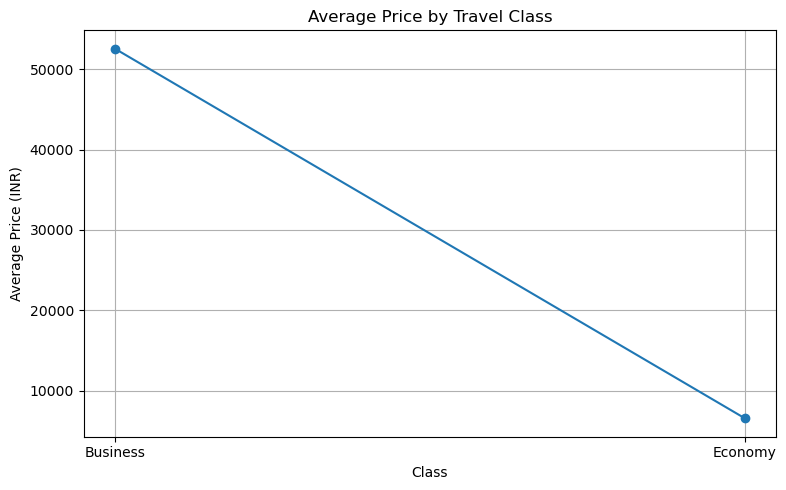

In [21]:
# Group by class and calculate the average price
class_price = df.groupby('class')['price'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(8, 5))
plt.plot(class_price['class'], class_price['price'], marker='o', linestyle='-')
plt.title('Average Price by Travel Class')
plt.xlabel('Class')
plt.ylabel('Average Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Prices distribution'}, xlabel='price', ylabel='Density'>

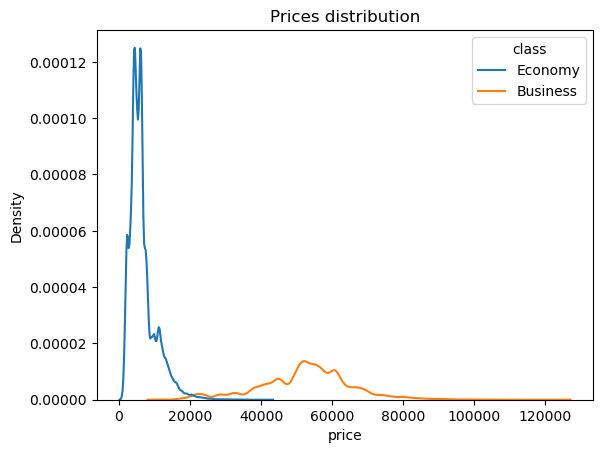

In [23]:
plt.title("Prices distribution")
sns.kdeplot(df, x="price", hue="class")

In [27]:
px.box(df, x="price", color="class")

In [31]:
df[(df["destination_city"] == "Delhi") & (df["stops"] == "one")].describe()["price"]

count     46536.000000
mean      20091.481197
std       21640.069148
min        2051.000000
25%        4876.000000
50%        7352.000000
75%       41269.000000
max      123071.000000
Name: price, dtype: float64

In [33]:
df[(df["destination_city"] == "Mumbai") & (df["stops"] == "zero")].describe()["price"]

count     8028.000000
mean      9757.318012
std      10858.621128
min       1830.000000
25%       2476.000000
50%       4499.000000
75%      17738.000000
max      58216.000000
Name: price, dtype: float64

In [35]:
df[(df["destination_city"] == "Chennai") & (df["stops"] == "two_or_more")].describe()["price"]

count      3239.000000
mean      20613.623032
std       22888.691441
min        1998.000000
25%        7610.000000
50%       10217.000000
75%       17459.500000
max      104466.000000
Name: price, dtype: float64

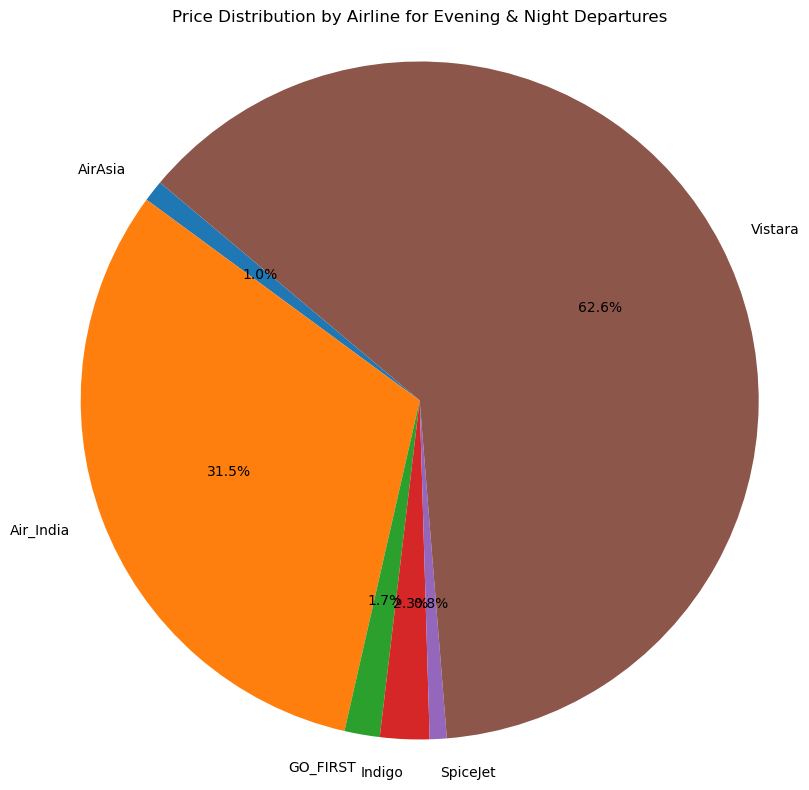

In [39]:
# Filter rows for departure time in Evening or Night
filtered_df = df[df['departure_time'].isin(['Evening', 'Night'])]

# Group by airline and sum the prices
price_by_airline = filtered_df.groupby('airline')['price'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(price_by_airline, labels=price_by_airline.index, autopct='%1.1f%%', startangle=140)
plt.title('Price Distribution by Airline for Evening & Night Departures')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()
plt.show()